In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [153]:
participant = "pilotB"

In [154]:
df = pd.read_csv(f"out/{participant}.csv")
df.head(60)

,index,pageName,question,answer,condition,next,click,hover,mouse,pointer,score,key,delta,participant
0,2024-07-24 20:16:51.395,Background Questions,0,20,undefined,0,0,0,0,0,NaN,NaN,0.000,pilotB
1,2024-07-24 20:16:51.395,Background Questions,1,2017,undefined,0,0,0,0,0,NaN,NaN,0.000,pilotB
2,2024-07-24 20:16:51.395,Background Questions,2,15,undefined,0,0,0,0,0,NaN,NaN,0.000,pilotB
3,2024-07-24 20:16:51.396,Background Questions,3,NaN,undefined,1,0,0,0,0,NaN,NaN,0.001,pilotB
4,2024-07-24 20:17:07.636,P1,qID-3,HJ,static,0,0,0,0,0,1.0,HJ,16.240,pilotB
5,2024-07-24 20:17:29.604,P1,qID-2,MN,static,0,0,0,0,0,1.0,MN,21.968,pilotB
6,2024-07-24 20:17:36.894,P1,qID-1,BC,static,0,0,0,0,0,1.0,BC,7.290,pilotB
7,2024-07-24 20:17:45.955,P2,qID-2,Angle DEF,static,0,0,0,0,0,1.0,Angle DEF,9.061,pilotB
8,2024-07-24 20:17:52.712,P2,qID-3,Angle NQP,static,0,0,0,0,0,1.0,Angle NQP,6.757,pilotB
9,2024-07-24 20:17:59.965,P2,qID-1,Angle GHJ,static,0,0,0,0,0,1.0,Angle GHJ,7.253,pilotB


In [155]:
#scores of student per phase
def update_score(phase, row, scores):
    c, s, k = row['condition'], row['score'], row['key']
    new_proof = {"s": 0, "a": 0, "percent": 0}
    scores[phase] = scores.get(phase, {})
    scores[phase][c] = scores.get(phase).get(c, {"s": 0, "a": 0, "percent": 0})
    scores[phase][c]["s"] = scores[phase][c]["s"] + s
    scores[phase][c]["a"] = scores[phase][c]["a"] + (1 if k else 0)
    return scores

scores, per_proof = {}, {}
for idx, row in df.iterrows():
    p, c, s, k, d, q = row['pageName'], row['condition'], row['score'], row['key'], row["delta"], row["question"]
    if p.startswith("P"):
        update_score("pretest", row, scores)
    elif p.startswith("T1_S1_"):
        update_score("phase1", row, scores)
        p = p.replace("T1_S", "")
    elif p.startswith("T1_S2_"):
        if not np.isnan(s):
            update_score("phase2", row, scores)
        p = p.replace("T1_S", "")
    elif p.startswith("Tutorial"):
        update_score("tutorial", row, scores)
        p = p.replace("TutorialProof", "T")

    per_proof[p] = per_proof.get(p, {"a": 0, "s": 0, "p": 0, "c": c, "d": 0, "n": 0})
    if not np.isnan(s):
        per_proof[p]["s"] = per_proof[p]["s"] + s
    if k:
        per_proof[p]["a"] = per_proof[p]["a"] + 1

    #don't count time or # of questions for the follow-up stage 2 questions
    if p.startswith("2_") and not q.endswith("1"):
        print("skipping", q, p)
        continue
    per_proof[p]["d"] = int(per_proof[p]["d"] + d)
    per_proof[p]["n"] = per_proof[p]["n"] + 1


for k, v in scores.items():
    for kk, vv in scores[k].items():
        scores[k][kk]["p"] = int(100 * scores[k][kk]["s"] / scores[k][kk]["a"]) if scores[k][kk]["a"] > 0 else 0

for k, v in per_proof.items():
    per_proof[k]["p"] = int(100 * per_proof[k]["s"] / per_proof[k]["a"])
pprint.pp(scores)
pprint.pp(per_proof)

skipping qID-2 2_IN1
skipping qID-3 2_IN1
{'pretest': {'static': {'s': 13.0, 'a': 14, 'percent': 0, 'p': 92}},
 'tutorial': {'interactive': {'s': 3.0, 'a': 3, 'percent': 0, 'p': 100}},
 'phase1': {'interactive': {'s': 8.0, 'a': 9, 'percent': 0, 'p': 88},
            'static': {'s': 10.0, 'a': 10, 'percent': 0, 'p': 100}},
 'phase2': {'static': {'s': 1.0, 'a': 2, 'percent': 0, 'p': 50},
            'interactive': {'s': 4.0, 'a': 4, 'percent': 0, 'p': 100}}}
{'Background Questions': {'a': 4,
                          's': 0,
                          'p': 0,
                          'c': 'undefined',
                          'd': 0,
                          'n': 4},
 'P1': {'a': 3, 's': 3.0, 'p': 100, 'c': 'static', 'd': 44, 'n': 3},
 'P2': {'a': 3, 's': 3.0, 'p': 100, 'c': 'static', 'd': 22, 'n': 3},
 'P5': {'a': 4, 's': 4.0, 'p': 100, 'c': 'static', 'd': 53, 'n': 4},
 'P7': {'a': 1, 's': 0.0, 'p': 0, 'c': 'static', 'd': 12, 'n': 1},
 'P6': {'a': 1, 's': 1.0, 'p': 100, 'c': 'static',

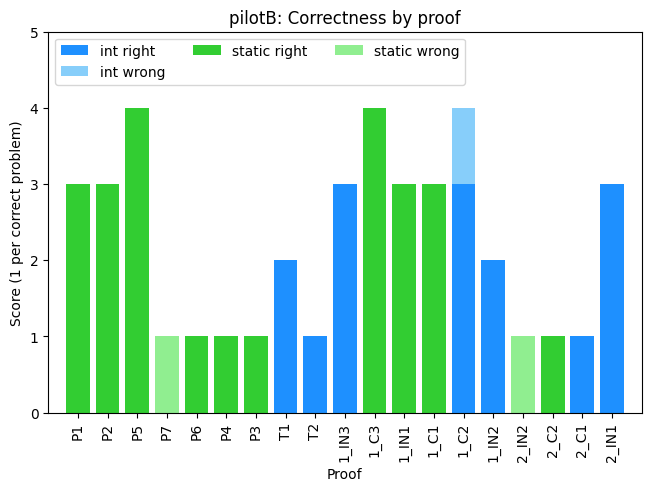

In [156]:
# for a participant, split by condition and by proof and question and vs correctness
proofs = list(df['pageName'].unique())
non_proofs = ["Background Questions", "Interactive SUS", "Static SUS"]
[proofs.remove(e) for e in non_proofs]

width = 0.5  # the width of the bars
fig, ax = plt.subplots(layout='constrained')
x, y1, y2, y1c, y2c = [], [], [], [], []
for proof, obj in per_proof.items():
    if proof in set(non_proofs):
        continue
    x.append(proof)
    y1.append(obj["s"] if obj["c"] == "interactive" else 0)
    y1c.append(obj["a"]-obj["s"] if obj["c"] == "interactive" else 0)
    y2.append(obj["s"] if not obj["c"] == "interactive" else 0)
    y2c.append(obj["a"]-obj["s"] if not obj["c"] == "interactive" else 0)
ax.bar(x, y1, label="int right", color="dodgerblue")
ax.bar(x, y1c, bottom=y1, label="int wrong", color="lightskyblue")
ax.bar(x, y2, bottom=y1c, label="static right", color="limegreen")
ax.bar(x, y2c, bottom=y2, label="static wrong", color="lightgreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Proof')
ax.set_ylabel('Score (1 per correct problem)')
ax.set_title(f'{participant}: Correctness by proof')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 5)
plt.xticks(rotation=90)
ax.set_xlim(-1, len(proofs))

plt.show()

In [157]:
plt.savefig(f'out/{participant}-correctness.png')

<Figure size 640x480 with 0 Axes>

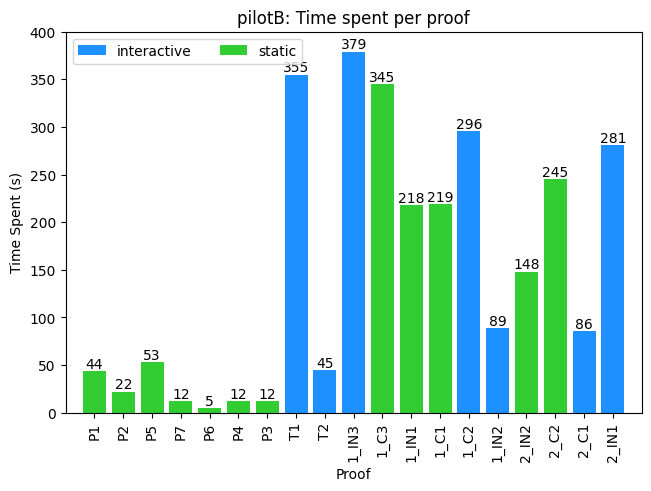

In [158]:
# for a participant, split by condition and by proof and question and vs correctness
proofs = list(df['pageName'].unique())
non_proofs = ["Background Questions", "Interactive SUS", "Static SUS"]
[proofs.remove(e) for e in non_proofs]

width = 0.5  # the width of the bars
fig, ax = plt.subplots(layout='constrained')
x, y1, y2 = [], [], []
for proof, obj in per_proof.items():
    if proof in set(non_proofs):
        continue
    x.append(proof)
    y1.append(obj["d"] if obj["c"] == "interactive" else 0)
    y2.append(obj["d"] if not obj["c"] == "interactive" else 0)
    plt.text(proof, obj["d"] + 3, obj["d"], horizontalalignment='center')
ax.bar(x, y1, label="interactive", color="dodgerblue")
ax.bar(x, y2, bottom=y1c, label="static", color="limegreen")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time Spent (s)')
ax.set_xlabel('Proof')
ax.set_title(f'{participant}: Time spent per proof')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 400)
plt.xticks(rotation=90)
ax.set_xlim(-1, len(proofs))

plt.show()

In [159]:
plt.savefig(f'out/{participant}-time.png')

<Figure size 640x480 with 0 Axes>

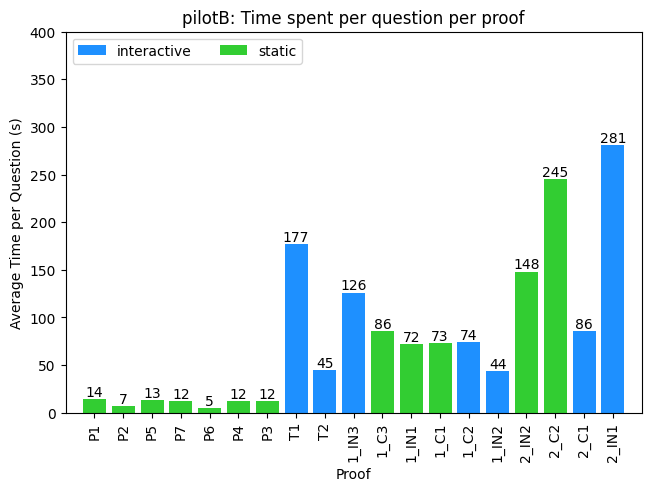

<Figure size 640x480 with 0 Axes>

In [160]:
# for a participant, split by condition and by proof and question and vs correctness
proofs = list(df['pageName'].unique())
non_proofs = ["Background Questions", "Interactive SUS", "Static SUS"]
[proofs.remove(e) for e in non_proofs]

width = 0.5  # the width of the bars
fig, ax = plt.subplots(layout='constrained')
x, y1, y2 = [], [], []
for proof, obj in per_proof.items():
    if proof in set(non_proofs):
        continue
    x.append(proof)
    avgT = int(obj["d"]/obj["n"])
    y1.append(avgT if obj["c"] == "interactive" else 0)
    y2.append(avgT if not obj["c"] == "interactive" else 0)
    plt.text(proof, avgT + 3, avgT, horizontalalignment='center')
    
p1 = ax.bar(x, y1, label="interactive", color="dodgerblue")
p2 = ax.bar(x, y2, bottom=y1c, label="static", color="limegreen")
# ax.bar_label(p1, padding=3)
# ax.bar_label(p2, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Time per Question (s)')
ax.set_xlabel('Proof')
ax.set_title(f'{participant}: Time spent per question per proof')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 400)
plt.xticks(rotation=90)
ax.set_xlim(-1, len(proofs))

plt.show()
plt.savefig(f'out/{participant}-timeperquestion.png')

['pretest', 'tutorial', 'phase1', 'phase2'] [78, 0, 77, 66] [0, 33, 90, 50]


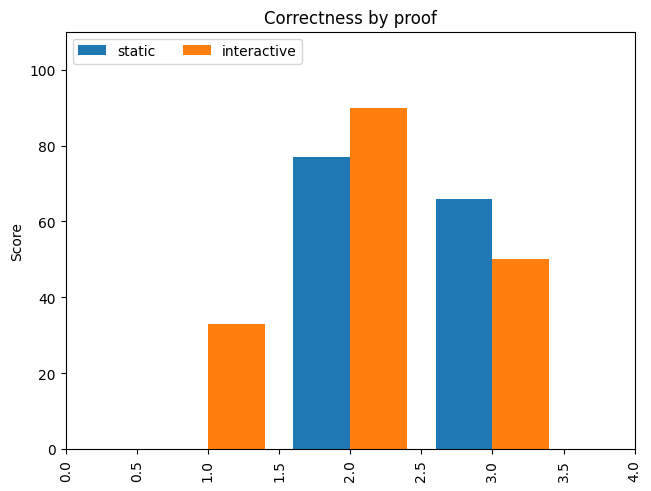

In [158]:
x = np.arange(len(proofs))  # the label locations
width = 0.5  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
x, y1, y2 = [], [], []
for phase, obj in scores.items():
    x.append(phase)
    has_static = "static" in obj.keys()
    has_inter = "interactive" in obj.keys()
    for cond, v in obj.items():
        if cond == "static":
            y1.append(v["p"])
        elif cond == "interactive":
            y2.append(v["p"])
    if not has_static:
        y1.append(0)
    if not has_inter:
        y2.append(0)

xs = np.arange(len(x)) 
width = 0.40

print(x, y1, y2)
# plot data in grouped manner of bar type 
plt.bar(xs-0.2, y1, width, label="static") 
plt.bar(xs+0.2, y2, width, label="interactive")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Correctness by proof')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 110)
plt.xticks(rotation=90)
ax.set_xlim(0, len(x))

plt.show()